<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.1.3

## Data

The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

You can download the data from [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure).

The purpose of today's lab is to use simulation to visualize the sampling distribution for the sample mean. The Central Limit Theorem (CLT) tells us that as our sample size gets larger, the sampling distribution of the sample mean converges to a normal distribution. Therefore, when we have a large sample size, we can say that the sampling distribution for the sample mean is approximately normal, regardless of the distribution from which we are sampling.

Let's start by taking a look at the data, **`Total Household Income`** will serve as a "population" for the purposes of this lab. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# house_hold = pd.read_csv("../../DATA/Family Income and Expenditure.csv")
house_hold = pd.read_csv('Family_Income_and_Expenditure.csv')

In [6]:
# Head... view first 5 rows of the dataset
house_hold.head().T

,0,1,2,3,4
Total Household Income,480332,198235,82785,107589,189322
Region,CAR,CAR,CAR,CAR,CAR
Total Food Expenditure,117848,67766,61609,78189,94625
Main Source of Income,Wage/Salaries,Wage/Salaries,Wage/Salaries,Wage/Salaries,Wage/Salaries
Agricultural Household indicator,0,0,1,0,0
Bread and Cereals Expenditure,42140,17329,34182,34030,34820
Total Rice Expenditure,38300,13008,32001,28659,30167
Meat Expenditure,24676,17434,7783,10914,18391
Total Fish and marine products Expenditure,16806,11073,2590,10812,11309
Fruit Expenditure,3325,2035,1730,690,1395


In [8]:
# Tail... view last 5 rows of the dataset
house_hold.tail().T

,41539,41540,41541,41542,41543
Total Household Income,119773,137320,133171,129500,128598
Region,XII - SOCCSKSARGEN,XII - SOCCSKSARGEN,XII - SOCCSKSARGEN,XII - SOCCSKSARGEN,XII - SOCCSKSARGEN
Total Food Expenditure,44875,31157,45882,81416,78195
Main Source of Income,Enterpreneurial Activities,Enterpreneurial Activities,Enterpreneurial Activities,Enterpreneurial Activities,Enterpreneurial Activities
Agricultural Household indicator,1,1,2,1,1
Bread and Cereals Expenditure,23675,2691,28646,29996,43485
Total Rice Expenditure,21542,1273,27339,26655,41205
Meat Expenditure,1476,1886,480,2359,1985
Total Fish and marine products Expenditure,6120,4386,4796,17730,7735
Fruit Expenditure,1632,1840,1232,2923,2062


In [9]:
# Shape... Shape = (ROWS, COLUMNS)
print(f'(ROWS, COLUMNS)=')
house_hold.shape

(41544, 60)

In [10]:
# Data Types
house_hold.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

#### Surveying the populations

##### 1. Create a histogram of `Total Household Income`.

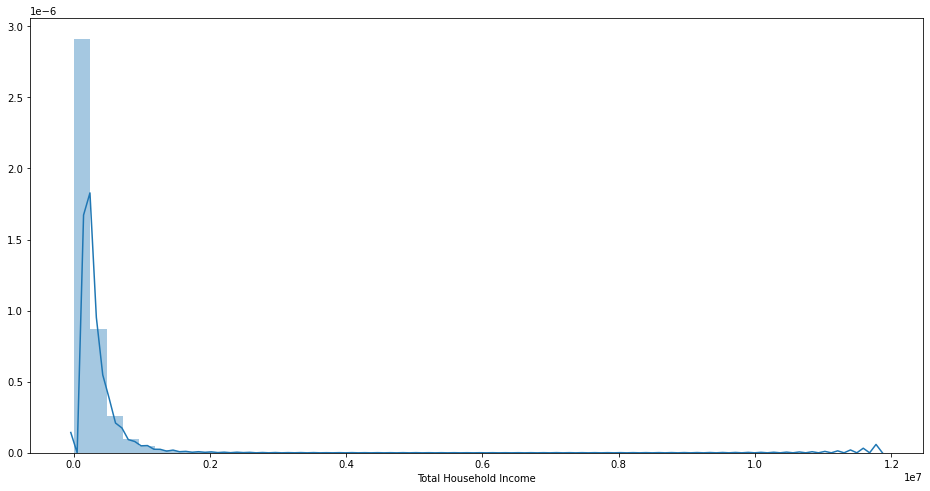

In [12]:
# ANSWER

fig, ax = plt.subplots(figsize = (16,8))
sns.distplot(house_hold['Total Household Income']);

##### 2. How would you describe the shape of this population?

**ANSWER**

> This distribution is called skewed right if, as in the histogram above, the right tail (larger values) is much longer than the left tail (small values).

##### 2. What is the mean income of this population?

In [13]:
# ANSWER
mean_income = house_hold['Total Household Income'].mean()
print('Mean Income:', mean_income)

Mean Income: 247555.58480165608


##### 3. What sampling statistic/point estimate would you use to estimate the mean of this population if you were given a random sample from the population?

In [14]:
# ANSWER

**ANSWER**

> We use the sample mean X as our estimate of the population mean μ. 

#### Simulated sampling (sample means)

Now, we'd like to get an idea of what happens when we take multiple random samples of size 5. 

Take 10 sample (size=5) from the entire population. Calculate means for each sample. Now make a histogram of all the sample means.

- Describe the shape of the histogram.
- What is the center of the distribution of sample means?

##### 4. Simulation with `sample_size=5`

Take 10 samples, but with a sample size of 5.

In [15]:
def calculate_sample_mean(df, column_name, N=10, sample_size=5):
    '''
    df: DataFrame
    column_name: String, column_name
    N: Number of samples
    sample_size: Size of sample for each sample
    '''
    sample_mean_list = []

    for i in range(N):
        df_sample = df.sample(n=sample_size)
        sample_mean = df_sample[column_name].mean()
        sample_mean_list.append(sample_mean)
    
    return sample_mean_list

In [19]:
def visual_sample_mean(population_mean, sample_mean_list):
    '''
    population_mean: mean of entire population
    sample_mean_list: list of sample mean
    '''
    
    sample_mean = np.mean(sample_mean_list)
    
    fig, ax = plt.subplots(figsize = (16,8))
    ax = sns.distplot(sample_mean_list);
    
    # plot a vertical line for population mean and sample mean
    ax.axvline(population_mean, color='black', linestyle='solid', lw=1)
    ax.axvline(sample_mean, color='red', linestyle='dashed', lw=1)
    
    plt.xlabel('Mean of Samples')
    plt.ylabel('Frequency')

    plt.show()

In [20]:
sample_mean_list = calculate_sample_mean(house_hold
                                         , 'Total Household Income'
                                         , N=10
                                         , sample_size=5)

###### 4.A Make a histogram of all the sample means

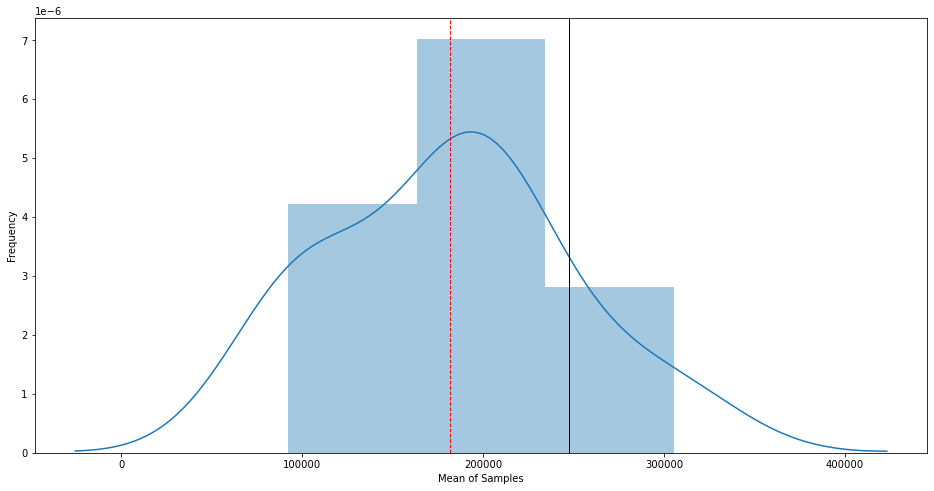

In [21]:
# ANSWER
visual_sample_mean(mean_income, sample_mean_list)

###### 4.B Describe the shape of the histogram.

**ANSWER:**

> This distribution is called skewed right if, as in the histogram above, the right tail (larger values) is much longer than the left tail (small values).

##### 7. Simulation with `sample_size=15`

let's try taking another 1000 samples, but with a sample size of 15

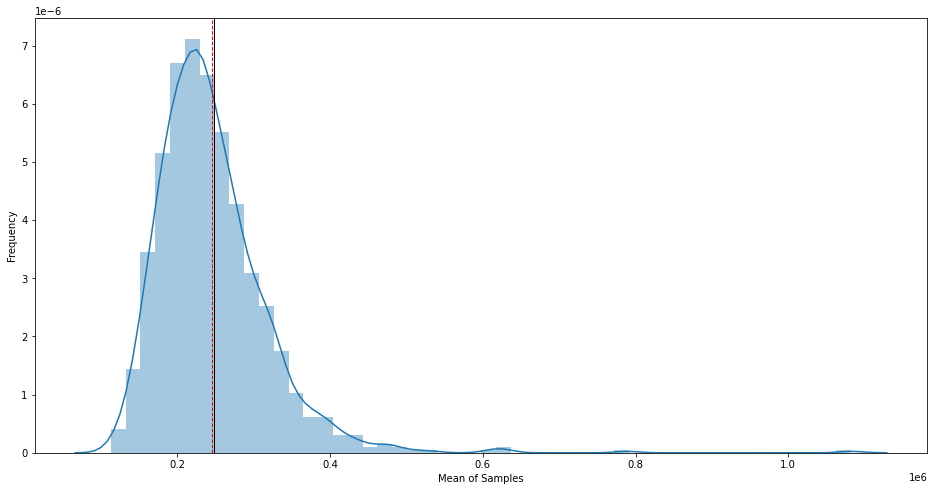

In [22]:
# ANSWER
sample_mean_list = calculate_sample_mean(house_hold
                                         , 'Total Household Income'
                                         , N=1000
                                         , sample_size=15)

visual_sample_mean(mean_income, sample_mean_list)

##### 8. Simulation with `sample_size=50`

Let's try taking another 1000 samples, but with a sample size of 50

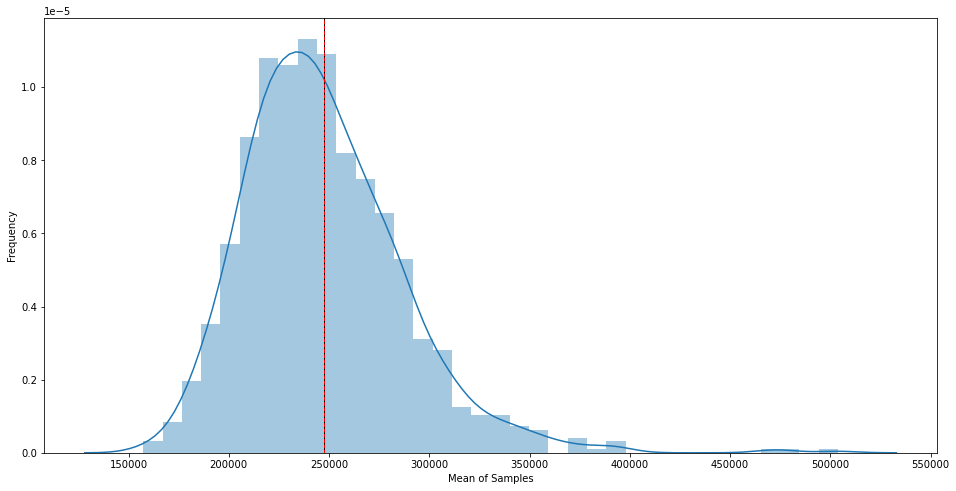

In [23]:
# ANSWER
sample_mean_list = calculate_sample_mean(house_hold
                                         , 'Total Household Income'
                                         , N=1000
                                         , sample_size=50)

visual_sample_mean(mean_income, sample_mean_list)

###### 8.A Describe the shape of the histogram of sample means (using sample size of 50)

**ANSWER:**

> This distribution is almost symmetric.

###### 8.B What is mean of the distribution of sample means?

In [24]:
# ANSWER
np.mean(sample_mean_list)

247349.06984000004

**ANSWER:**

> If repeated random samples of a given size n are taken from a population of values for a quantitative variable, where the population mean is μ (mu) and the population standard deviation is σ (sigma) then the mean of all sample means (x-bars) is population mean μ (mu).

###### 8.C As the sample size grew, did your results confirm the CLT?

**ANSWER:**

Yes.
    
> To summarize, the distribution of sample means will be approximately normal as long as the sample size is large enough. 

> We will depend on the Central Limit Theorem again and again in order to do normal probability calculations when we use sample means to draw conclusions about a population mean. We now know that we can do this even if the population distribution is not normal.



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



